In [1]:
from scipy.stats import norm
from scipy.optimize import fsolve


print("p=",norm.cdf(6,3,5)-norm.cdf(2,3,5))
f=lambda c: norm.cdf(2*c,3,5)-norm.cdf(-3*c,3,5)-0.6
print("c=",fsolve(f,0))

p= 0.3050065916890295
c= [2.29103356]


上alpha分位数分别为 [3.09023231 2.5758293  2.32634787 1.95996398 1.64485363 1.28155157]


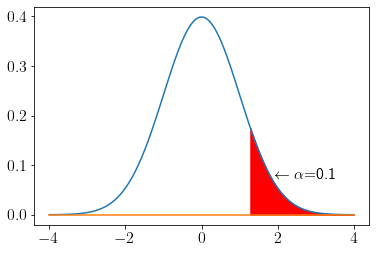

In [2]:
from scipy.stats import norm
from pylab import plot,fill_between,show,text,savefig,rc
from numpy import array, linspace, zeros



alpha=array([0.001, 0.005, 0.01, 0.025, 0.05, 0.10])
za=norm.ppf(1-alpha,0,1)  #求上alpha分位数
print("上alpha分位数分别为", za)
x=linspace(-4, 4, 100); y=norm.pdf(x, 0, 1)
rc('font',size=16); rc('text',usetex=True)
plot(x,y)  #画标准正态分布密度曲线
x2=linspace(za[-1],4,100); y2=norm.pdf(x2);
y1=[0]*len(x2)
fill_between(x2, y1, y2, color='r')  #y1,y2对应的点之间填充
plot([-4,4],[0,0])  #画水平线
text(1.9, 0.07, "$\\leftarrow\\alpha$=0.1")  #标注
savefig("概率论与数理统计/figure4_2.png", dpi=500); show()

In [3]:
from scipy.stats import binom



n, p=20, 0.8
print("期望和方差分布为：", binom.stats(n,p))


期望和方差分布为： (array(16.), array(3.2))


In [4]:
from scipy.stats import binom



n, p=20, 0.8
mean, variance, skewness, kurtosis=binom.stats(n, p, moments='mvsk') 
#上述语句不显示，只为了说明数据顺序
print("所求的数字特征为：", binom.stats(n, p, moments='mvsk'))

所求的数字特征为： (array(16.), array(3.2), array(-0.3354102), array(0.0125))


In [6]:
from scipy.integrate import quad
from numpy import exp, sqrt, pi, abs



a=80; b=0.02; BD=a/b; mu=4000; s=100
y=lambda x: x*exp(-(x-mu)**2/(2*s**2))/sqrt(2*pi)/s   #定义积分的被积函数
I=0; x1=0; x2=10000
while abs(I-BD)>1E-16:
    c=(x1+x2)/2
    I=quad(y,-10000,c)[0] #由3sigma准则这里积分下限取为-10000,取零效果一样
    if I>BD:
        x2=c
    else:
        x1=c


print("最佳更换周期为：", c)

最佳更换周期为： 4826.66015625


In [8]:
from numpy import reshape, hstack, mean, median, ptp, var, std, cov, corrcoef
import pandas as pd



df = pd.read_excel("数据集/Pdata4_6_1.xlsx",header=None)
a=df.values  #提取数据矩阵
h=a[:,::2]  #提取奇数列身高
w=a[:,1::2]  #提取偶数列体重
h=reshape(h,(-1, 1)) #转换成列向量，自动计算行数
w=reshape(w,(-1, 1)) #转换成列向量，自动计算行数
hw=hstack([h,w])  #构造两列的数组
print([mean(h),median(h),ptp(h),var(h),std(h)])  #计算均值,中位数,极差,方差,标准差
print("协方差为：{}\n相关系数为：{}".format(cov(hw.T)[0,1],corrcoef(hw.T)[0,1]))


[170.25, 170.0, 31, 28.8875, 5.374709294464213]
协方差为：16.982323232323235
相关系数为：0.4560968250128602


In [9]:
from numpy import reshape, c_
import pandas as pd


df = pd.read_excel("数据集/Pdata4_6_1.xlsx",header=None)
a=df.values; h1=a[:,::2]; w1=a[:,1::2]
h2=reshape(h1,(-1, 1)); w2=reshape(w1,(-1, 1))
df2=pd.DataFrame(c_[h2,w2],columns=["身高","体重"])  #构造数据框
print("求得的描述统计量如下：\n",df2.describe())
print("偏度为：\n",df2.skew())
print("峰度为：\n",df2.kurt())
print("分位数为：\n",df2.quantile(0.9))

求得的描述统计量如下：
                身高          体重
count  100.000000  100.000000
mean   170.250000   61.270000
std      5.401786    6.892911
min    155.000000   47.000000
25%    167.000000   57.000000
50%    170.000000   62.000000
75%    173.000000   65.250000
max    186.000000   77.000000
偏度为：
 身高    0.156868
体重    0.140148
dtype: float64
峰度为：
 身高    0.648742
体重   -0.290479
dtype: float64
分位数为：
 身高    177.0
体重     70.1
Name: 0.9, dtype: float64


体重的频数表为： (array([ 9., 13., 27., 31., 11.,  9.]), array([47., 52., 57., 62., 67., 72., 77.]), <BarContainer object of 6 artists>)


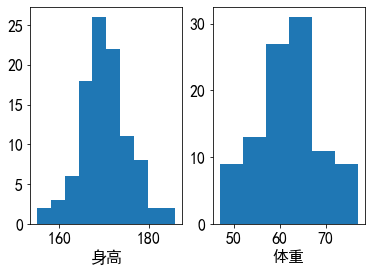

In [1]:
import numpy as np
import matplotlib.pyplot as plt



a=np.loadtxt("数据集/Pdata4_6_2.txt")
h=a[:,::2]; w=a[:,1::2]
h=np.reshape(h,(-1,1)); w=np.reshape(w,(-1,1))
plt.rc('font',size=16); plt.rc('font',family="SimHei")
plt.subplot(121); plt.xlabel("身高"); plt.hist(h,10) #只画直方图不返回频数表
plt.subplot(122); ps=plt.hist(w,6)  #画图并返回频数表ps
plt.xlabel("体重"); print("体重的频数表为：", ps)
plt.savefig("概率论与数理统计/figure4_8.png", dpi=500); plt.show()

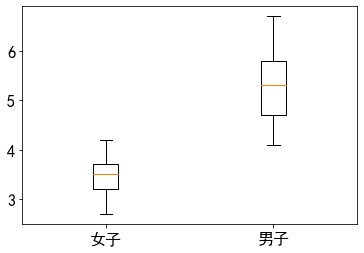

In [2]:
import numpy as np
import matplotlib.pyplot as plt


a=np.loadtxt("./数据集/Pdata4_9.txt")  #读入两行的数据
b=a.T  #转置成两列的数据
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.boxplot(b,labels=['女子','男子'])
plt.savefig('./概率论与数理统计/figure4_9.png', dpi=500); plt.show()

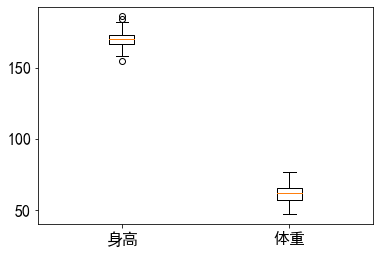

In [3]:
import numpy as np
import matplotlib.pyplot as plt



a=np.loadtxt("./数据集/Pdata4_6_2.txt")
h=a[:,::2]; w=a[:,1::2]
h=np.reshape(h,(-1,1)); w=np.reshape(w,(-1,1))
hw=np.hstack((h,w)); plt.rc('font',size=16)
plt.rc('font',family='SimHei')
plt.boxplot(hw,labels=['身高','体重'])
plt.savefig("./概率论与数理统计/figure4_10.png",dpi=500); plt.show()

(array([0.02, 0.04, 0.09, 0.12, 0.16, 0.19, 0.29, 0.36, 0.47, 0.49, 0.63,
       0.7 , 0.8 , 0.84, 0.88, 0.9 , 0.93, 0.94, 0.97, 1.  ]), array([47. , 48.5, 50. , 51.5, 53. , 54.5, 56. , 57.5, 59. , 60.5, 62. ,
       63.5, 65. , 66.5, 68. , 69.5, 71. , 72.5, 74. , 75.5, 77. ]), [<matplotlib.patches.Polygon object at 0x000001B9D184D7F0>])


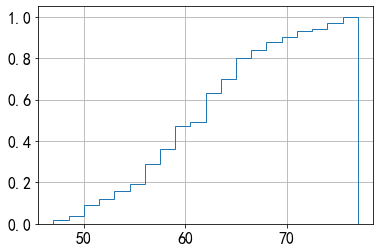

In [4]:
import numpy as np
import matplotlib.pyplot as plt



a=np.loadtxt("./数据集/Pdata4_6_2.txt")
w=a[:,1::2]; w=np.reshape(w,(-1,1)); plt.rc('font',size=16)
h=plt.hist(w,20,density=True, histtype='step', cumulative=True)
print(h); plt.grid()
plt.savefig("./概率论与数理统计/figure4_11.png",dpi=500); plt.show()

[170.25, 5.374709294464213]


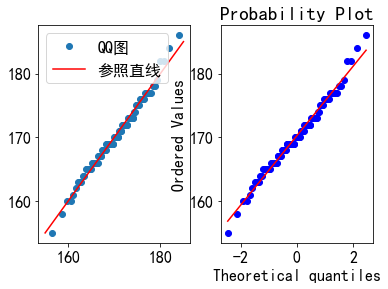

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot



a=np.loadtxt("./数据集/Pdata4_6_2.txt")
h=a[:,::2]; h=h.flatten()
mu=np.mean(h); s=np.std(h); print([mu,s])
sh=np.sort(h) #按从小到大排序
n=len(sh); xi=(np.arange(1,n+1)-1/2)/n
yi=norm.ppf(xi,mu,s)
plt.rc('font',size=16);plt.rc('font',family='SimHei')
plt.rc('axes',unicode_minus=False) #用来正常显示负号
plt.subplot(121); plt.plot(yi, sh, 'o', label='QQ图');
plt.plot([155,185],[155,185],'r-',label='参照直线')
plt.legend(); plt.subplot(122)
res = probplot(h,plot=plt)
plt.savefig("./概率论与数理统计/figure4_12.png",dpi=500); plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



a=np.loadtxt("./数据集/Pdata4_6_2.txt")
h=a[:,::2]; h=h.flatten()
mu=np.mean(h); s=np.std(h);
print("样本均值和标准差为：",[mu,s])
print("极大似然估计值为：", norm.fit(h))

样本均值和标准差为： [170.25, 5.374709294464213]
极大似然估计值为： (170.25, 5.374709294464213)


In [8]:
from numpy import array, sqrt
from scipy.stats import t



a=array([506,  508,  499,  503,  504,  510,  497,  512,
514,  505,  493,  496,  506,  502,  509,  496])
# ddof取值为1时，标准偏差除的是(N-1)；NumPy中的std计算默认是除以N
mu=a.mean(); s=a.std(ddof=1)  #计算均值和标准差
print(mu, s); alpha=0.05; n=len(a)
val=(mu-s/sqrt(n)*t.ppf(1-alpha/2,n-1),mu+s/sqrt(n)*t.ppf(1-alpha/2,n-1))
print("置信区间为：",val)

503.75 6.202150164795002
置信区间为： (500.44510746243924, 507.05489253756076)


In [9]:
import numpy as np
import scipy.stats as ss
from scipy import stats



a=np.array([506,  508,  499,  503,  504,  510,  497,  512,
514,  505,  493,  496,  506,  502,  509,  496])
alpha=0.95; df=len(a)-1
ci=ss.t.interval(alpha,df,loc=a.mean(),scale=ss.sem(a))
print("置信区间为：",ci)

置信区间为： (500.44510746243924, 507.05489253756076)


In [10]:
import numpy as np
from statsmodels.stats.weightstats import zconfint
from scipy import stats




a=np.array([506,  508,  499,  503,  504,  510,  497,  512,
514,  505,  493,  496,  506,  502,  509,  496])
ci=zconfint(a)
print("置信区间为：",ci)

置信区间为： (500.7110022625732, 506.7889977374268)


In [11]:
import numpy as np
from statsmodels.stats.weightstats import ztest



sigma=0.015
a=np.array([0.497, 0.506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512])
tstat1, pvalue=ztest(a,value=0.5)  #计算T统计量的观测值及p值
tstat2=tstat1*a.std(ddof=1)/sigma  #转换为Z统计量的观测值
print('t值为：',round(tstat1,4))
print('z值为：',round(tstat2,4)); print('p值为:',round(pvalue,4))

t值为： 3.5849
z值为： 2.2444
p值为: 0.0003


In [12]:
import numpy as np
from statsmodels.stats.weightstats import ztest



a=np.array([3.25, 3.27, 3.24, 3.26, 3.24])
tstat, pvalue=ztest(a,value=3.25)
print('检验统计量为：',tstat); print('p值为:',pvalue)

检验统计量为： 0.34299717028498317
p值为: 0.7316005889599273


In [13]:
import numpy as np
from statsmodels.stats.weightstats import ztest



a=np.array([16, 25, 21, 20, 23, 21, 19, 15, 13,
            23, 17, 20, 29, 18, 22, 16, 22])
tstat, pvalue=ztest(a,value=21, alternative='smaller')
print('检验统计量为：',tstat); print('p值为:',pvalue)

检验统计量为： -1.0348266239966402
p值为: 0.15037494342517732


In [14]:
import numpy as np
from statsmodels.stats.weightstats import ttest_ind



a=np.array([0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217])
b=np.array([0.209, 0.205, 0.196, 0.210, 0.202, 0.207,
            0.224, 0.223, 0.220, 0.201])
tstat, pvalue, df=ttest_ind(a, b, value=0)
print('检验统计量为：',tstat); print('p值为:',pvalue)
print('自由度为：',df)

检验统计量为： 3.878137625860771
p值为: 0.0013338206615241311
自由度为： 16.0


In [15]:
import numpy as np
import scipy.stats as ss



bins=np.arange(1,8)
mi=np.array([36, 23, 29, 31, 34, 60, 25])
n=mi.sum(); p=np.ones(7)/7
cha=(mi-n*p)**2/(n*p); st=cha.sum()
bd=ss.chi2.ppf(0.95,len(bins)-1) #计算上alpha分位数
print("统计量为：{}，临界值为：{}".format(st,bd))

统计量为：26.941176470588236，临界值为：12.591587243743977


均值为： 15.078
标准差为： 0.428154177837844
最大值为： 15.9
最小值为： 14.2
各区间的频数为： [ 8.  6. 10. 10.  4. 12.] 
小区间端点值为： [14.2    14.625  14.8375 15.05   15.2625 15.475  15.9   ]
各小区取值的理论概率为： [0.14502086 0.14213474 0.18677335 0.19280761 0.15636145 0.17690199]
统计量为：3.2998742691953424，临界值为：7.814727903251179


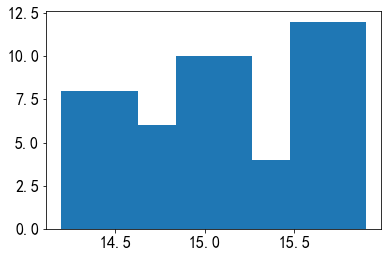

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss




n=50; k=8 #初始小区间划分的个数
a=np.loadtxt("./数据集/Pdata4_20.txt")
a=a.flatten(); mu=a.mean(); s=a.std()
print("均值为：", mu); print("标准差为：", s)
print("最大值为：",a.max()); print("最小值为：",a.min())
bins=np.array([14.2, 14.625, 14.8375, 15.05, 15.2625, 15.475, 15.9])
h=plt.hist(a,bins)
f=h[0]; x=h[1] #提取各个小区间的频数和小区间端点的取值
print("各区间的频数为：",f,"\n小区间端点值为：",x)
p=ss.norm.cdf(x, mu, s)  #计算各个分点分布函数的取值
dp=np.diff(p)  #计算各小区间取值的理论概率
dp[0]=ss.norm.cdf(x[1],mu,s)  #修改第一个区间的概率值
dp[-1]=1-ss.norm.cdf(x[-2],mu,s)  #修改最后一个区间的概率值
print("各小区取值的理论概率为：",dp)
st=sum(f**2/(n*dp))-n  #计算卡方统计量的值
bd=ss.chi2.ppf(0.95,k-5) #计算上alpha分位数
print("统计量为：{}，临界值为：{}".format(st,bd))

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss



a=np.loadtxt("./数据集/Pdata4_6_2.txt")
w=a[:,1::2]; w=w.flatten()
mu=w.mean(); s=w.std(ddof=1)  #计算样本均值和标准差
print("均值和标准差分别为：", (mu, s))
statVal, pVal=ss.kstest(w,'norm',(mu,s))
print("统计量和P值分别为：", [statVal, pVal])

均值和标准差分别为： (61.27, 6.892911012208283)
统计量和P值分别为： [0.05904454095634937, 0.8561177331775733]


In [19]:
import numpy as np
import statsmodels.api as sm



y=np.array([1620, 1670, 1700, 1750, 1800, 1580, 1600, 1640, 1720,
            1460, 1540, 1620, 1680, 1500, 1550, 1610])
x=np.hstack([np.ones(5), np.full(4,2), np.full(4,3), np.full(3,4)])
d= {'x':x,'y':y}   #构造字典
model = sm.formula.ols("y~C(x)",d).fit()   #构建模型
anovat = sm.stats.anova_lm(model)  #进行单因素方差分析
print(anovat)


            df        sum_sq       mean_sq         F    PR(>F)
C(x)       3.0  60153.333333  20051.111111  3.727742  0.042004
Residual  12.0  64546.666667   5378.888889       NaN       NaN


In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm



df = pd.read_excel("./数据集/Pdata4_23.xlsx", header=None)
a=df.values.T.flatten()
b=np.arange(1,6)
x=np.tile(b,(4,1)).T.flatten()
d={'x':x,'y':a} #构造求解需要的字典
model = sm.formula.ols("y~C(x)",d).fit()  #构建模型
anovat = sm.stats.anova_lm(model)  #进行单因素方差分析
print(anovat)


            df   sum_sq   mean_sq         F    PR(>F)
C(x)       4.0   6125.7  1531.425  2.261741  0.110913
Residual  15.0  10156.5   677.100       NaN       NaN


In [21]:
import numpy as np
import statsmodels.api as sm



y=np.array([[11, 11, 13, 10], [10, 11, 9, 12],
         [9, 10, 7, 6], [7, 8, 11, 10],
         [5, 13, 12, 14], [11, 14, 13, 10]]).flatten()
A=np.tile(np.arange(1,5),(6,1)).flatten()
B=np.tile(np.arange(1,4).reshape(3,1),(1,8)).flatten()
d={'x1':A,'x2':B,'y':y}
model = sm.formula.ols("y~C(x1)+C(x2)+C(x1):C(x2)",d).fit()  #注意交互作用公式的写法
anovat = sm.stats.anova_lm(model)  #进行双因素方差分析
print(anovat)

               df     sum_sq    mean_sq         F    PR(>F)
C(x1)         3.0  19.125000   6.375000  1.330435  0.310404
C(x2)         2.0  40.083333  20.041667  4.182609  0.041856
C(x1):C(x2)   6.0  18.250000   3.041667  0.634783  0.701009
Residual     12.0  57.500000   4.791667       NaN       NaN


拟合的多项式为:-23.950588628514094*x+266.16625505997683
预测值为： 74.56154603186408


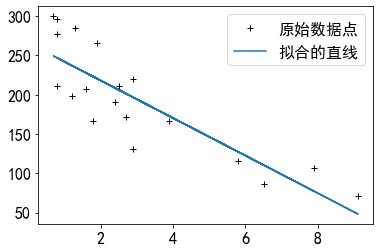

In [23]:
import matplotlib.pyplot as plt
import numpy as np



x=[2.5, 3.9, 2.9, 2.4, 2.9, 0.8, 9.1, 0.8, 0.7,7.9, 1.8, 1.9, 0.8, 6.5, 1.6, 5.8, 1.3, 1.2, 2.7]
y=[211, 167, 131, 191, 220, 297, 71, 211, 300, 107,
   167, 266, 277, 86, 207, 115, 285, 199, 172]
plt.plot(x,y,'+k', label="原始数据点")
p=np.polyfit(x,y,deg=1)  #拟合一次多项式
print("拟合的多项式为:{}*x+{}".format(p[0],p[1]))
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.plot(x, np.polyval(p,x), label="拟合的直线")
print("预测值为：", np.polyval(p, 8)); plt.legend()
plt.savefig("./概率论与数理统计/figure4_25_1.png", dpi=500); plt.show()

In [1]:
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")


x=[2.5, 3.9, 2.9, 2.4, 2.9, 0.8, 9.1, 0.8, 0.7,7.9,
   1.8, 1.9, 0.8, 6.5, 1.6, 5.8, 1.3, 1.2, 2.7]
y=[211, 167, 131, 191, 220, 297, 71, 211, 300, 107,
   167, 266, 277, 86, 207, 115, 285, 199, 172]
df={'x':x,'y':y}
res=sm.formula.ols('y~x',data=df).fit()
print(res.summary(),'\n')
ypred=res.predict(dict(x=8))
print('所求的预测值为:',list(ypred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     43.99
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           4.23e-06
Time:                        19:46:43   Log-Likelihood:                -95.241
No. Observations:                  19   AIC:                             194.5
Df Residuals:                      17   BIC:                             196.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.1663     14.044     18.953      0.0

In [26]:
import statsmodels.api as sm
import numpy as np



x=np.array([2.5, 3.9, 2.9, 2.4, 2.9, 0.8, 9.1, 0.8, 0.7,
    7.9, 1.8, 1.9, 0.8, 6.5, 1.6, 5.8, 1.3, 1.2, 2.7])
y=np.array([211, 167, 131, 191, 220, 297, 71, 211, 300,
    107, 167, 266, 277, 86, 207, 115, 285, 199, 172])
X=sm.add_constant(x)
md=sm.OLS(y,X).fit()  #构建并拟合模型
print(md.params,'\n--------\n')  #提取回归系数
print(md.summary2())
ypred=md.predict([1,8])  #第一列必须加1
print("预测值为：",ypred)

[266.16625506 -23.95058863] 
--------

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.705   
Dependent Variable: y                AIC:                194.4811
Date:               2022-08-12 12:22 BIC:                196.3700
No. Observations:   19               Log-Likelihood:     -95.241 
Df Model:           1                F-statistic:        43.99   
Df Residuals:       17               Prob (F-statistic): 4.23e-06
R-squared:          0.721            Scale:              1478.3  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      266.1663   14.0437  18.9527  0.0000  236.5365  295.7960
x1         -23.9506    3.6110  -6.6327  0.0000  -31.5691  -16.3321
-----------------------------------------------------------------
Omnibus:               2.827        Durbin-Watson

In [31]:
import pandas as pd



a=pd.read_excel("./数据集/Pdata4_26_1.xlsx")
print("是否存在重复观测：",any(a.duplicated()))  #输出：True
a.drop_duplicates(inplace=True)  #inplace=True时，直接删除a中的重复数据
f=pd.ExcelWriter('./数据集/Pdata4_26_2.xlsx')  #创建文件对象
a.to_excel(f)  #把a写入新Excel文件中
f.save()       #保存文件，数据才真正写入Excel文件
f.close()

是否存在重复观测： True


In [32]:
from numpy import NaN
from pandas import Series


data=Series([10.0, None, 20, NaN, 30])
print(data.isnull())  #输出每个元素的检测结果
print("是否存在缺失值：", any(data.isnull()))  #输出：True

0    False
1     True
2    False
3     True
4    False
dtype: bool
是否存在缺失值： True


In [33]:
from pandas import read_excel



a=read_excel("./数据集/Pdata2_33.xlsx",usecols=range(1,4))
b1=a.dropna()  #删除所有的缺失值
b2=a.dropna(axis=1, thresh=9)  #删除有效数据个数小于9的列
b3=a.drop('用户B', axis=1)      #删除用户B的数据
print(b1,'\n---------------\n',b2,'\n---------------\n',b3)

      用户A     用户B      用户C
0  235.83  324.03  478.320
1  236.27  325.63  515.450
2  238.05  328.08  517.090
6  237.41  391.26  516.230
8  237.61  388.02  435.350
9  238.03  206.43  487.675 
---------------
       用户A     用户B
0  235.83  324.03
1  236.27  325.63
2  238.05  328.08
3  235.90     NaN
4  236.76  268.82
5     NaN  404.04
6  237.41  391.26
7  238.65  380.81
8  237.61  388.02
9  238.03  206.43 
---------------
       用户A      用户C
0  235.83  478.320
1  236.27  515.450
2  238.05  517.090
3  235.90  514.890
4  236.76      NaN
5     NaN  486.090
6  237.41  516.230
7  238.65      NaN
8  237.61  435.350
9  238.03  487.675


In [36]:
from pandas import read_excel



a=read_excel("./数据集/Pdata4_29.xlsx")
b1=a.fillna(0)  #用0填补所有的缺失值
b2=a.fillna(method='ffill')  #用前一行的值填补缺失值
b3=a.fillna(method='bfill')  #用后一行的值填补，最后一行缺失值不处理
b4=a.fillna(value={'gender':a.gender.mode()[0],   #性别使用众数替换
                'age':a.age.mean(),          #年龄使用均值替换
                'income':a.income.median()}) #收入使用中位数替换


print(b1,'\n---------------\n',b2,'\n---------------\n',b3,'\n---------------\n',b4)

        uid regit_date gender   age   income
0  81200457 2016-10-30      M  23.0   6500.0
1  81201135 2016-11-08      M  27.0  10300.0
2  80043782 2016-10-13      F   0.0  13500.0
3  84639281 2017-04-17      M  26.0   6000.0
4  73499801 2016-03-21      0   0.0   4500.0
5  72399510 2016-01-18      M  19.0      0.0
6  63881943 2015-10-07      M  21.0  10000.0
7  35442690 2015-04-10      F   0.0   5800.0
8  77638351 2016-07-12      M  25.0  18000.0
9  85200189 2017-05-18      M  22.0      0.0 
---------------
         uid regit_date gender   age   income
0  81200457 2016-10-30      M  23.0   6500.0
1  81201135 2016-11-08      M  27.0  10300.0
2  80043782 2016-10-13      F  27.0  13500.0
3  84639281 2017-04-17      M  26.0   6000.0
4  73499801 2016-03-21      M  26.0   4500.0
5  72399510 2016-01-18      M  19.0   4500.0
6  63881943 2015-10-07      M  21.0  10000.0
7  35442690 2015-04-10      F  21.0   5800.0
8  77638351 2016-07-12      M  25.0  18000.0
9  85200189 2017-05-18      M  22.0  

In [38]:
from pandas import read_excel
import numpy as np



a=read_excel("./数据集/Pdata4_29.xlsx")
b=a.fillna(value={'gender':a.gender.mode()[0],
                'age':a.age.interpolate(method='polynomial', order=2),
#年龄使用二次多项式插值替换
                'income':a.income.interpolate()}) #收入使用线性插值替换

print(a,'\n---------------\n',b)

        uid regit_date gender   age   income
0  81200457 2016-10-30      M  23.0   6500.0
1  81201135 2016-11-08      M  27.0  10300.0
2  80043782 2016-10-13      F   NaN  13500.0
3  84639281 2017-04-17      M  26.0   6000.0
4  73499801 2016-03-21    NaN   NaN   4500.0
5  72399510 2016-01-18      M  19.0      NaN
6  63881943 2015-10-07      M  21.0  10000.0
7  35442690 2015-04-10      F   NaN   5800.0
8  77638351 2016-07-12      M  25.0  18000.0
9  85200189 2017-05-18      M  22.0      NaN 
---------------
         uid regit_date gender        age   income
0  81200457 2016-10-30      M  23.000000   6500.0
1  81201135 2016-11-08      M  27.000000  10300.0
2  80043782 2016-10-13      F  27.875282  13500.0
3  84639281 2017-04-17      M  26.000000   6000.0
4  73499801 2016-03-21      M  21.748310   4500.0
5  72399510 2016-01-18      M  19.000000   7250.0
6  63881943 2015-10-07      M  21.000000  10000.0
7  35442690 2015-04-10      F  23.939144   5800.0
8  77638351 2016-07-12      M  25.000

标准差法异常值上限检测： True
标准差法异常值下限检测： False
箱线图法异常值上限检测： True
箱线图法异常值下限检测： False


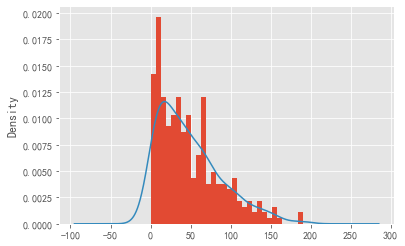

异常值替换前的数据统计特征 count    289.000000
mean      48.613495
std       39.474103
min        0.000000
25%       15.600000
50%       39.000000
75%       68.900000
max      190.200000
Name: counts, dtype: float64
判别异常值的上限临界值为: 148.85000000000002
用以替换异常值的数据为： 141.7
异常值替换后的数据统计特征 count    289.000000
mean      48.066090
std       37.918895
min        0.000000
25%       15.600000
50%       39.000000
75%       68.900000
max      141.700000
Name: counts, dtype: float64


In [39]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt




a=read_csv("./数据集/sunspots.csv")
mu=a.counts.mean()  #计算黑子个数年平均值
s=a.counts.std()  #计算黑子个数标准差
print("标准差法异常值上限检测：",any(a.counts>mu+2*s))  #输出：True
print("标准差法异常值下限检测：",any(a.counts<mu-2*s))  #输出：False
Q1=a.counts.quantile(0.25)  #计算下四分位数
Q3=a.counts.quantile(0.75)  #计算上四分位数
IQR=Q3-Q1
print("箱线图法异常值上限检测：",any(a.counts>Q3+1.5*IQR))  #输出：True
print("箱线图法异常值下限检测：",any(a.counts<Q1-1.5*IQR))  #输出：False
plt.style.use('ggplot')  #设置绘图风格
a.counts.plot(kind='hist',bins=30,density=True)  #绘制直方图
a.counts.plot(kind='kde')  #绘制核密度曲线
plt.show()
print("异常值替换前的数据统计特征",a.counts.describe())
UB=Q3+1.5*IQR;
st=a.counts[a.counts<UB].max()  #找出低于判别上限的最大值
print("判别异常值的上限临界值为:",UB)
print("用以替换异常值的数据为：",st)
a.loc[a.counts>UB, 'counts']=st  #替换超过判别上限异常值
print("异常值替换后的数据统计特征",a.counts.describe())
